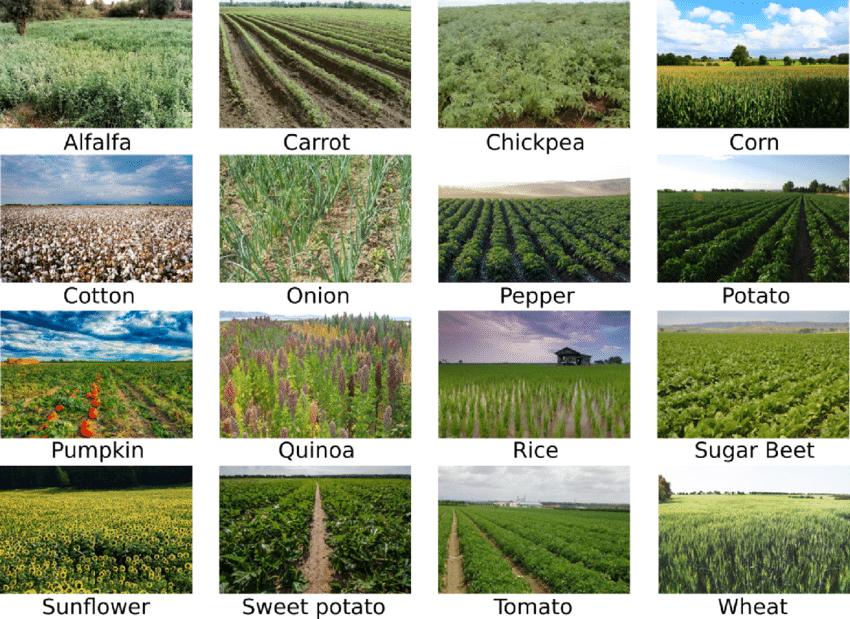

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data
crop_data =pd.read_csv('https://raw.githubusercontent.com/dassourav134/Data-Science/Machine-Learning-Projects/Crop_recommendation.csv', header = 0)

In [3]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop_data.shape

(17600, 8)

In [5]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17600 entries, 0 to 17599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            17591 non-null  float64
 1   P            17590 non-null  float64
 2   K            17586 non-null  float64
 3   temperature  17586 non-null  float64
 4   humidity     17587 non-null  float64
 5   ph           17589 non-null  float64
 6   rainfall     17595 non-null  float64
 7   label        17577 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [6]:
# checking unique values in each feature
crop_data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [7]:
# Generating descriptive statistics for the crop_data dataset
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,17591.000000,17590.000000,17586.000000,17586.000000,17587.000000,17589.000000,17595.000000
mean,50.560912,53.367652,48.155863,25.614863,71.486059,6.469445,103.470518
std,36.913534,32.984577,50.641775,5.062768,22.255146,0.773894,54.951536
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.766430,60.268542,5.971332,64.558823
50%,37.000000,51.000000,32.000000,25.597049,80.474764,6.424671,94.953353
75%,85.000000,68.000000,49.000000,28.561498,89.937010,6.923509,124.391510
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
# Checking for null values
crop_data.isnull().sum()


N               9
P              10
K              14
temperature    14
humidity       13
ph             11
rainfall        5
label          23
dtype: int64

In [9]:
#missing value imputation with median for numerical features
crop_data['N'].fillna(crop_data['N'].median(), inplace = True)
crop_data['P'].fillna(crop_data['P'].median(), inplace = True)
crop_data['K'].fillna(crop_data['K'].median(), inplace = True)
crop_data['temperature'].fillna(crop_data['temperature'].median(), inplace = True)
crop_data['humidity'].fillna(crop_data['humidity'].median(), inplace = True)
crop_data['rainfall'].fillna(crop_data['rainfall'].median(), inplace = True)
crop_data['ph'].fillna(crop_data['ph'].median(), inplace = True)

In [10]:
#missing value imputation with mode for categorical features
crop_data['label'].fillna(crop_data['label'].mode()[0], inplace=True)


In [11]:
#checking null values imputation result
crop_data.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
## Renaming the column 'label' to 'crop' in the DataFrame crop_data
crop_data.rename(columns={'label': 'crop'}, inplace=True)


In [13]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice




```
#Exploratory Data Analysis

# Univariate Analysis

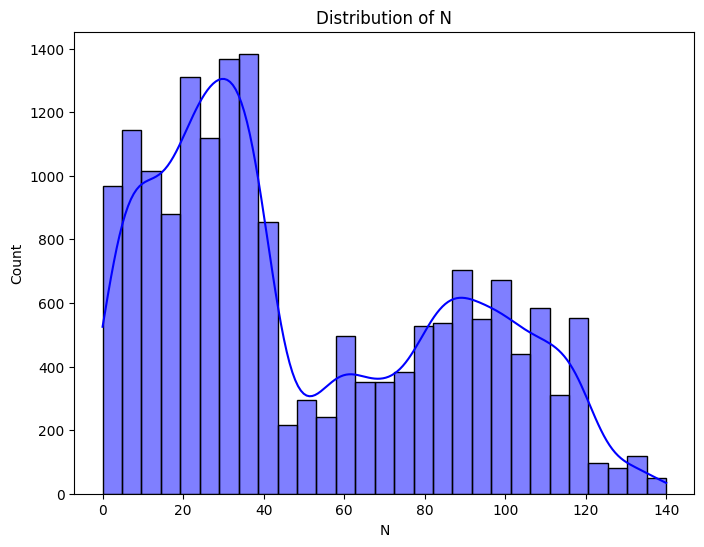

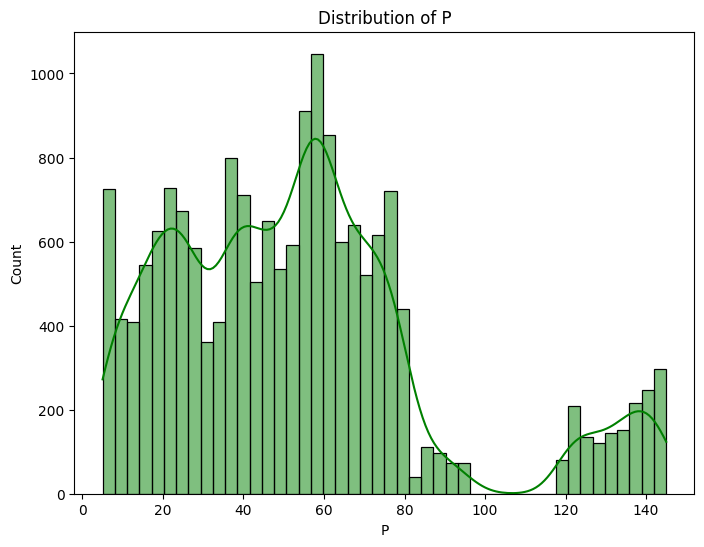

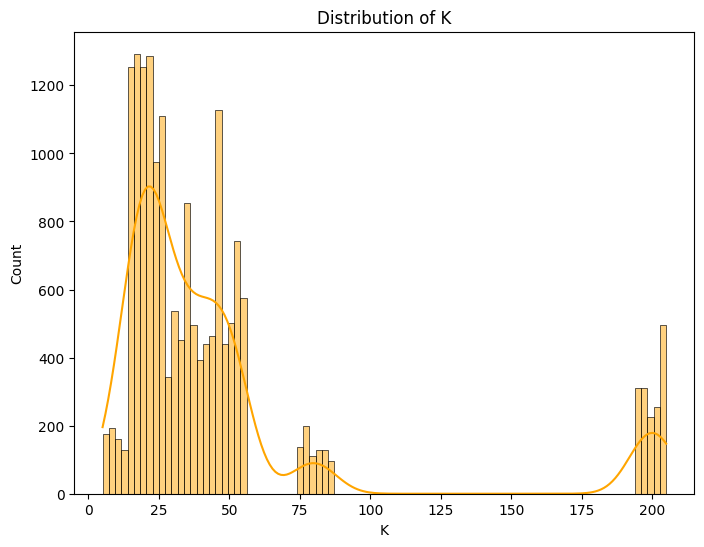

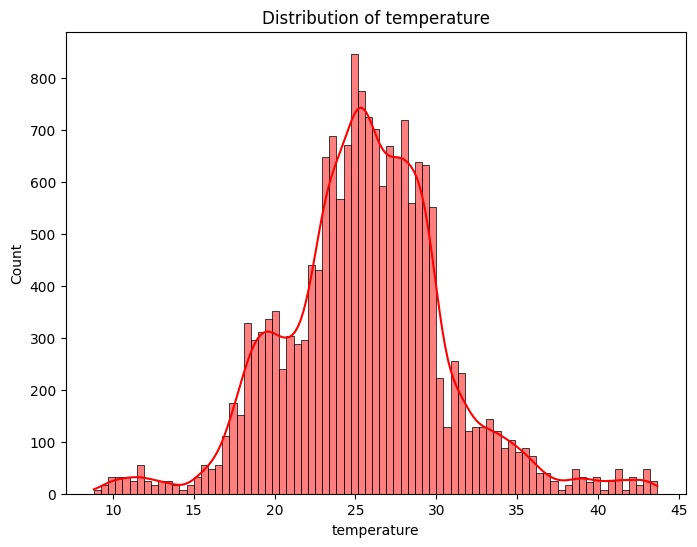

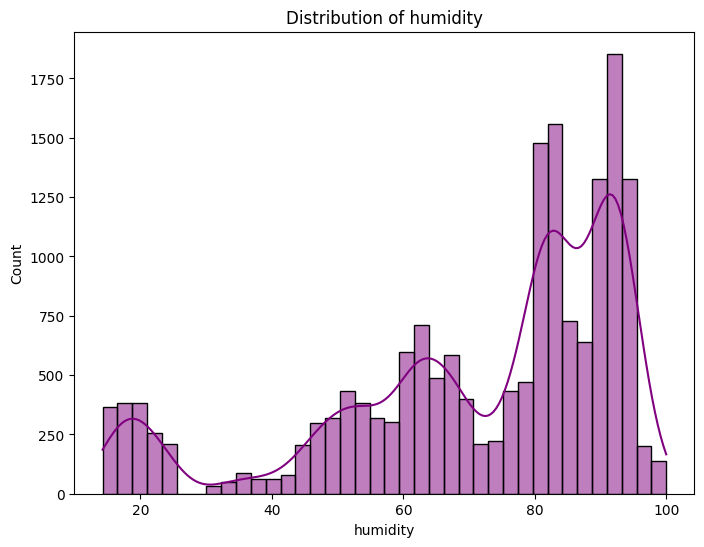

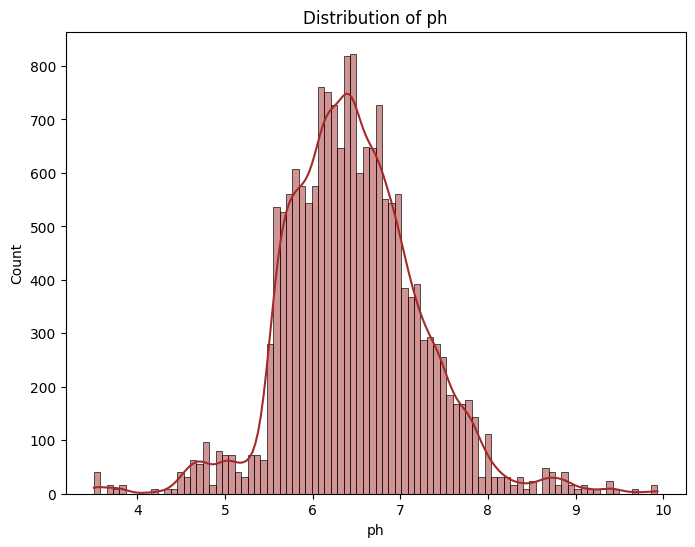

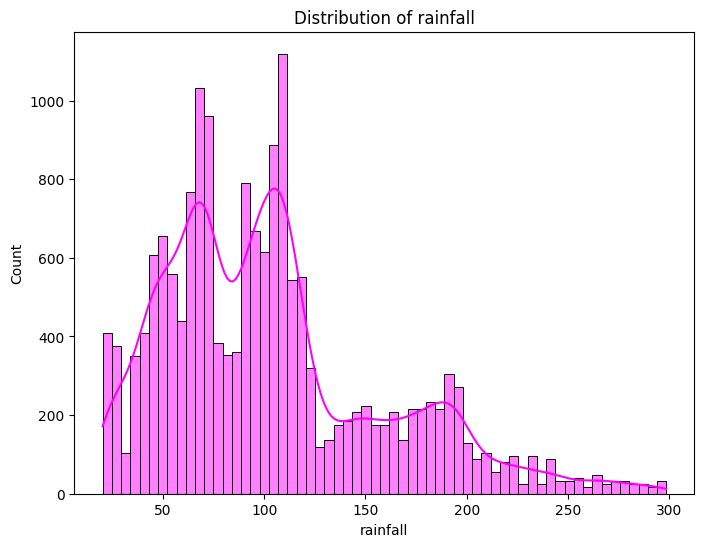

In [14]:
## Plotting histograms to show the distributions of numerical features
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'magenta']

for i, feature in enumerate(numerical_features):
    plt.figure(figsize=(8,6))
    sns.histplot(crop_data[feature], kde=True, color=colors[i])
    plt.title(f'Distribution of {feature}')
    plt.show()


<ipython-input-15-077ca5ac6f83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crop_data, x='crop', palette='plasma_r')


<function matplotlib.pyplot.show(close=None, block=None)>

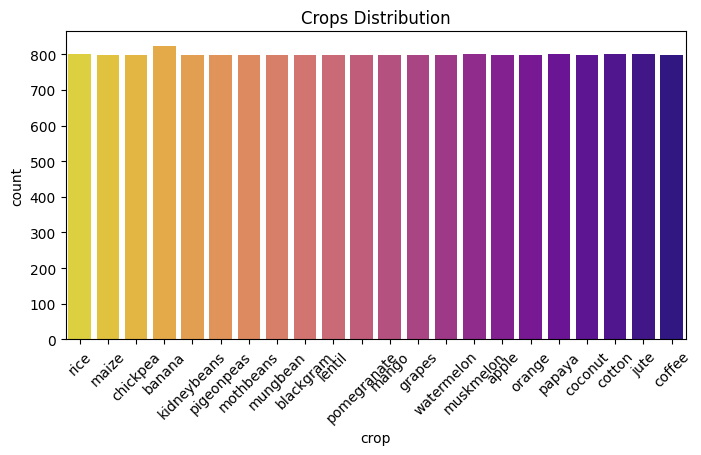

In [15]:
## Plotting barplots to visualize the distribution of categorical feature
plt.figure(figsize=(8,4))
sns.countplot(data=crop_data, x='crop', palette='plasma_r')
plt.title('Crops Distribution')
plt.xticks(rotation=45)
plt.show

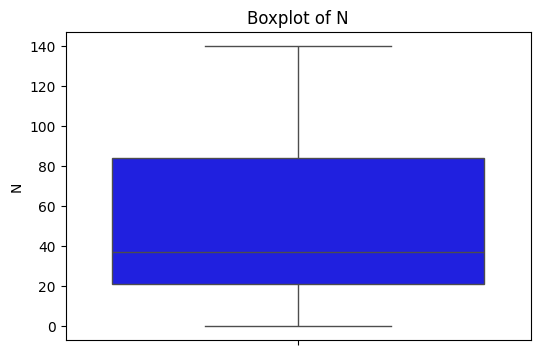

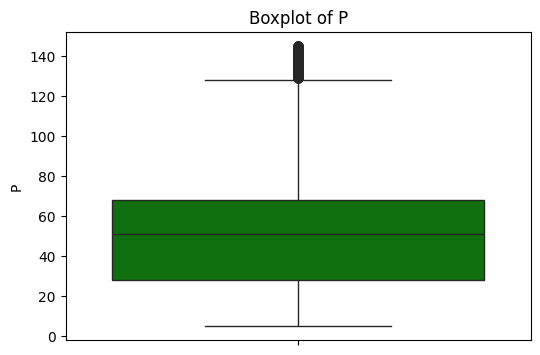

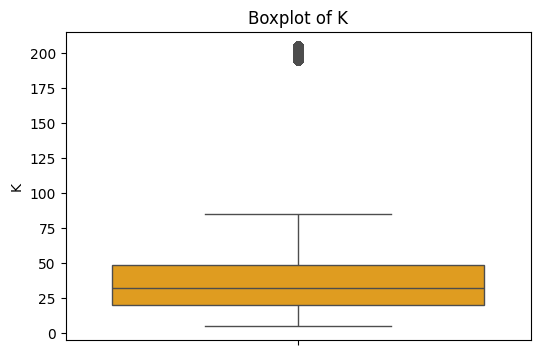

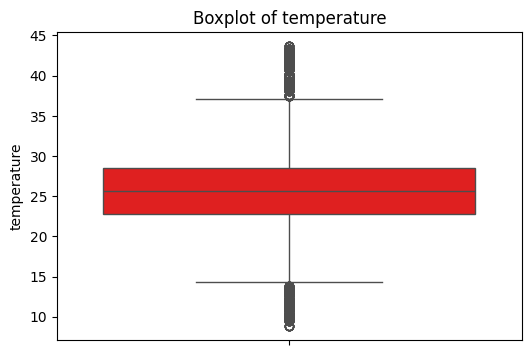

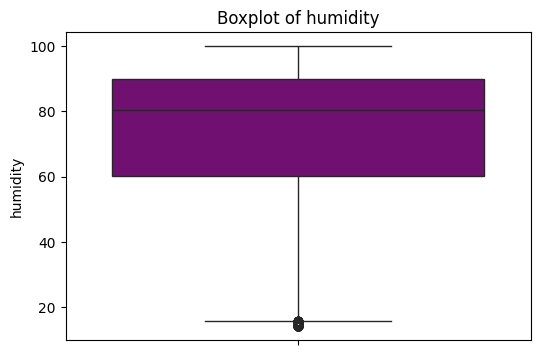

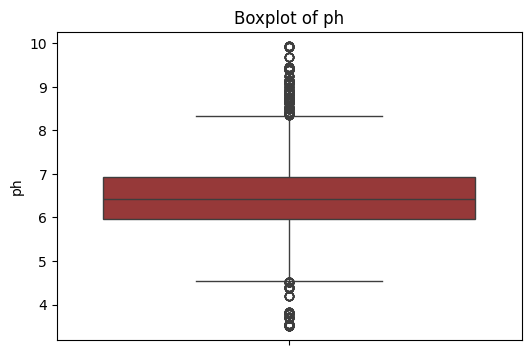

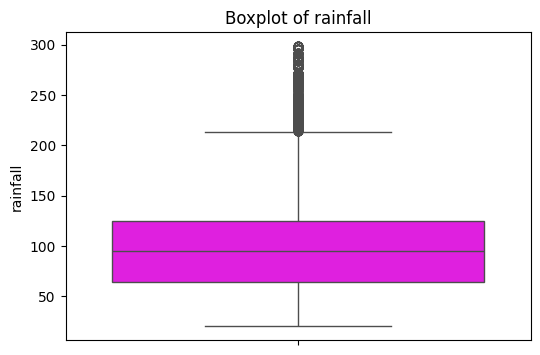

In [16]:
## Using boxplots to identify outliers in the numerical variables
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'magenta']

for i, feature in enumerate(numerical_features):
    plt.figure(figsize=(6,4))
    sns.boxplot(crop_data[feature], color=colors[i])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [17]:
# Setting a cap value at the 95th percentile for the features to limit potential outliers

cap_value1 = crop_data['P'].quantile(0.95)
crop_data['P'] = np.where(crop_data['P'] > cap_value1, cap_value1, crop_data['P'])

cap_value2 = crop_data['K'].quantile(0.95)
crop_data['K'] = np.where(crop_data['K'] > cap_value2, cap_value2, crop_data['K'])

cap_value3 = crop_data['temperature'].quantile(0.95)
crop_data['temperature'] = np.where(crop_data['temperature'] > cap_value3, cap_value3, crop_data['temperature'])

cap_value4 = crop_data['humidity'].quantile(0.95)
crop_data['humidity'] = np.where(crop_data['humidity'] > cap_value4, cap_value4, crop_data['humidity'])

cap_value5 = crop_data['rainfall'].quantile(0.95)
crop_data['rainfall'] = np.where(crop_data['rainfall'] > cap_value5, cap_value5, crop_data['rainfall'])

cap_value6 = crop_data['ph'].quantile(0.95)
crop_data['ph'] = np.where(crop_data['ph'] > cap_value6, cap_value6, crop_data['ph'])


In [18]:
## Setting a floor value at the 5th percentile for the features to limit potential outliers
floor_value1 = crop_data['P'].quantile(0.05)
crop_data['P'] = np.where(crop_data['P'] < floor_value1, floor_value1, crop_data['P'])

floor_value2 = crop_data['K'].quantile(0.05)
crop_data['K'] = np.where(crop_data['K'] < floor_value2, floor_value2, crop_data['K'])

floor_value3 = crop_data['temperature'].quantile(0.05)
crop_data['temperature'] = np.where(crop_data['temperature'] < floor_value3, floor_value3, crop_data['temperature'])

floor_value4 = crop_data['humidity'].quantile(0.05)
crop_data['humidity'] = np.where(crop_data['humidity'] < floor_value4, floor_value4, crop_data['humidity'])

floor_value5 = crop_data['rainfall'].quantile(0.05)
crop_data['rainfall'] = np.where(crop_data['rainfall'] < floor_value5, floor_value5, crop_data['rainfall'])

floor_value6 = crop_data['ph'].quantile(0.05)
crop_data['ph'] = np.where(crop_data['ph'] < floor_value6, floor_value6, crop_data['ph'])


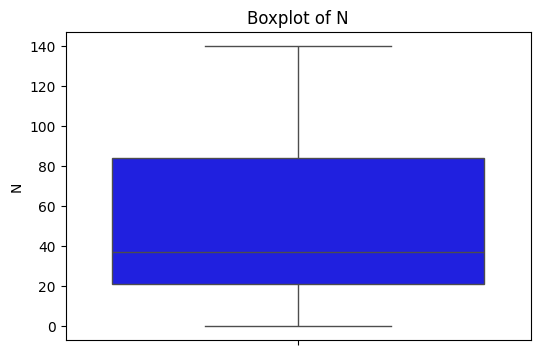

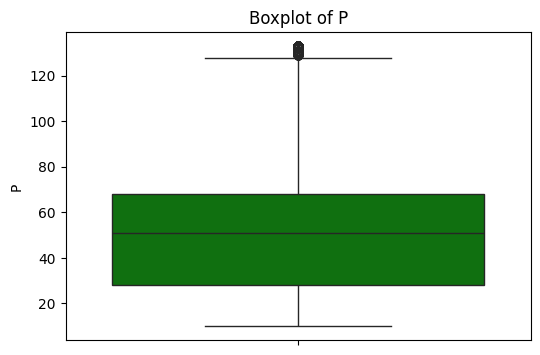

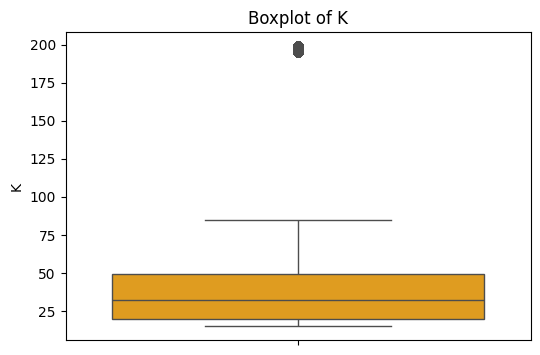

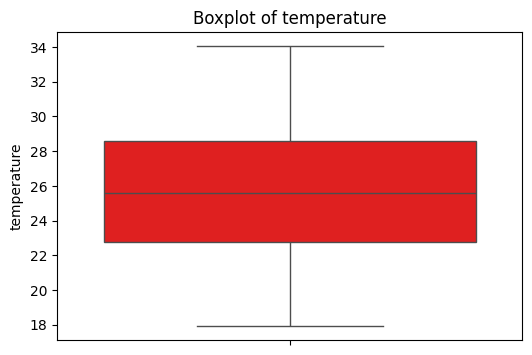

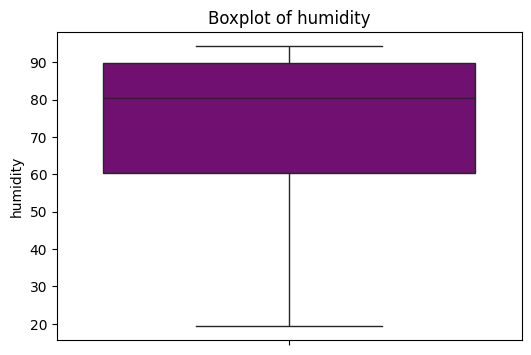

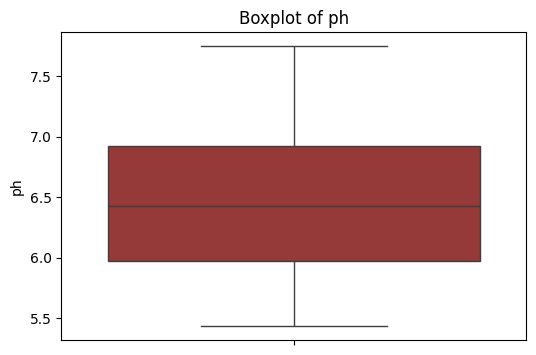

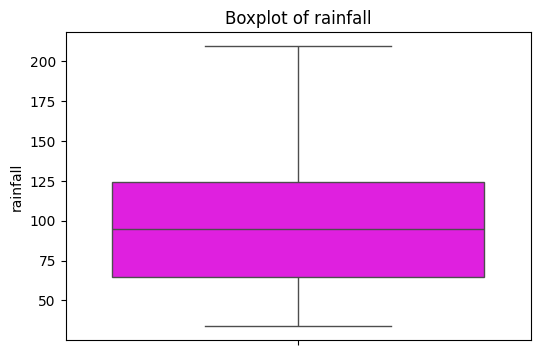

In [19]:
# Checking the result of outlier treatment
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'magenta']

for i, feature in enumerate(numerical_features):
    plt.figure(figsize=(6,4))
    sns.boxplot(crop_data[feature], color=colors[i])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [20]:
# Outlier treatment using IQR method for 'P' and 'K' features
Q1_P = crop_data['P'].quantile(0.25)
Q3_P = crop_data['P'].quantile(0.75)
IQR_P = Q3_P - Q1_P
lower_bound_P = Q1_P - 1.5 * IQR_P
upper_bound_P = Q3_P + 1.5 * IQR_P
crop_data['P'] = np.where(crop_data['P'] > upper_bound_P, upper_bound_P, crop_data['P'])
crop_data['P'] = np.where(crop_data['P'] < lower_bound_P, lower_bound_P, crop_data['P'])

Q1_K = crop_data['K'].quantile(0.25)
Q3_K = crop_data['K'].quantile(0.75)
IQR_K = Q3_K - Q1_K
lower_bound_K = Q1_K - 1.5 * IQR_K
upper_bound_K = Q3_K + 1.5 * IQR_K
crop_data['K'] = np.where(crop_data['K'] > upper_bound_K, upper_bound_K, crop_data['K'])
crop_data['K'] = np.where(crop_data['K'] < lower_bound_K, lower_bound_K, crop_data['K'])


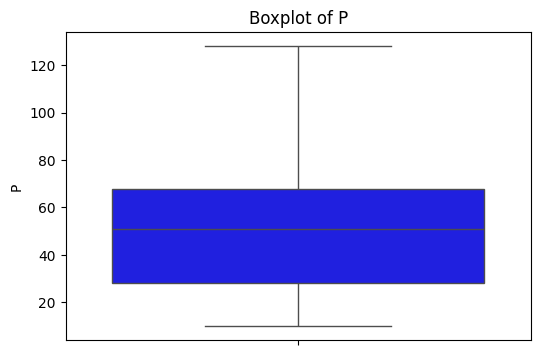

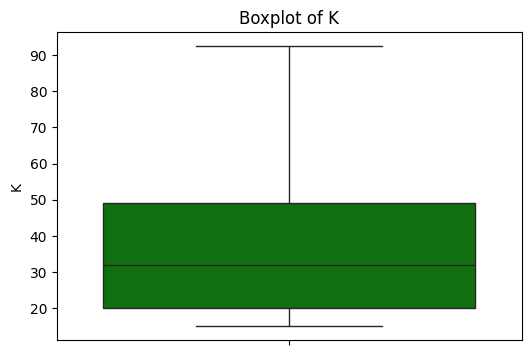

In [21]:
# Again Checking the result of outlier treatment
numerical_features = ['P', 'K']
colors = ['blue', 'green']

for i, feature in enumerate(numerical_features):
    plt.figure(figsize=(6,4))
    sns.boxplot(crop_data[feature], color=colors[i])
    plt.title(f'Boxplot of {feature}')
    plt.show()

<ipython-input-22-9461b0326901>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, data=crop_data, palette='muted')


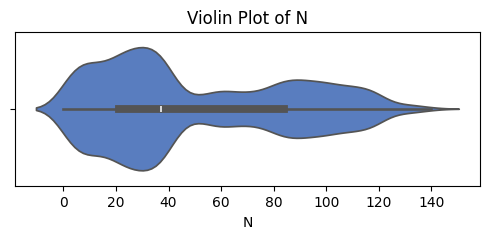

<ipython-input-22-9461b0326901>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, data=crop_data, palette='muted')


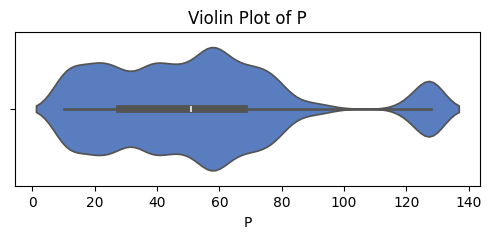

<ipython-input-22-9461b0326901>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, data=crop_data, palette='muted')


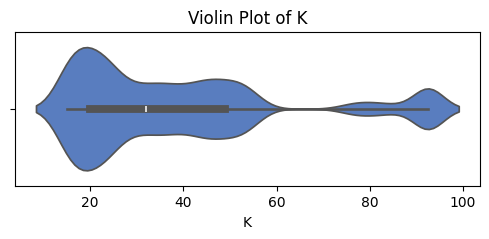

<ipython-input-22-9461b0326901>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, data=crop_data, palette='muted')


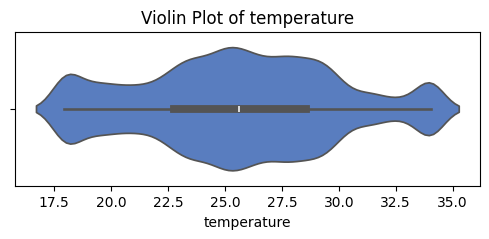

<ipython-input-22-9461b0326901>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, data=crop_data, palette='muted')


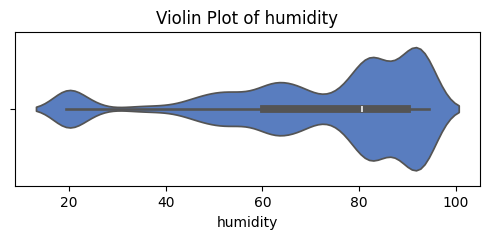

<ipython-input-22-9461b0326901>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, data=crop_data, palette='muted')


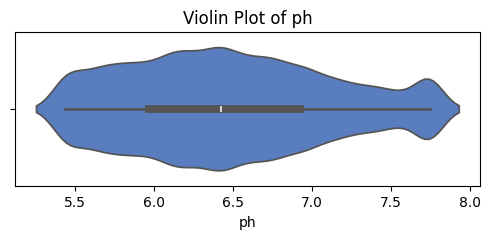

<ipython-input-22-9461b0326901>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, data=crop_data, palette='muted')


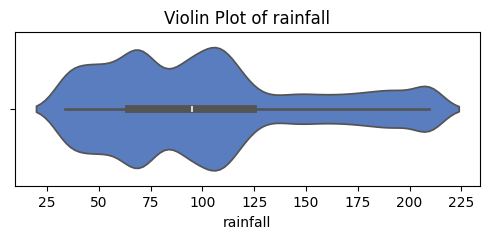

In [22]:
#using violin plots to see the distributions including the probability density for the numerical features

numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for feature in numerical_features:
    plt.figure(figsize=(6,2))
    sns.violinplot(x=feature, data=crop_data, palette='muted')
    plt.title(f'Violin Plot of {feature}')
    plt.show()

# Multivariate Analysis

In [23]:
#Categorizing the crops into four groups - 'fruits','grains', 'lentils', 'peas'
def categorize_crops(crop):
    fruits = ['banana', 'papaya', 'muskmelon', 'coconut', 'apple', 'watermelon', 'mango', 'pomegranate', 'grapes', 'orange']
    grains = ['rice', 'jute', 'cotton', 'maize']
    lentils = ['lentil','blackgram']
    peas = ['pigeonpeas', 'chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'coffee']

    if crop in fruits:
        return 'Fruits'
    elif crop in grains:
        return 'Grains'
    elif crop in lentils:
        return 'Lentils'
    elif crop in peas:
        return 'Peas'
    else:
        return 'Other'

# Creating a new column 'crop_category' based on the categorization of each crop
crop_data['crop_category'] = crop_data['crop'].apply(categorize_crops)

<ipython-input-24-783a1f4aa8e2>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crop_data, x=categorical_variable, y=feature, ci=None, order=avg_data)


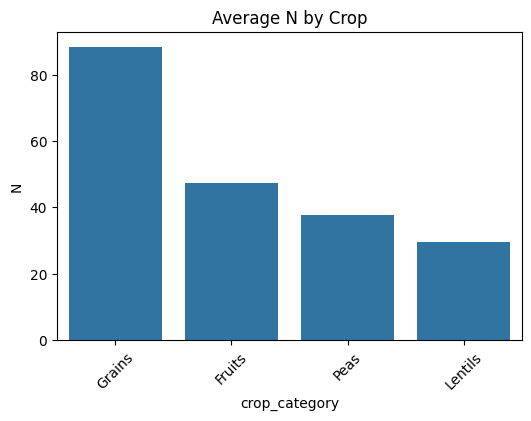

<ipython-input-24-783a1f4aa8e2>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crop_data, x=categorical_variable, y=feature, ci=None, order=avg_data)


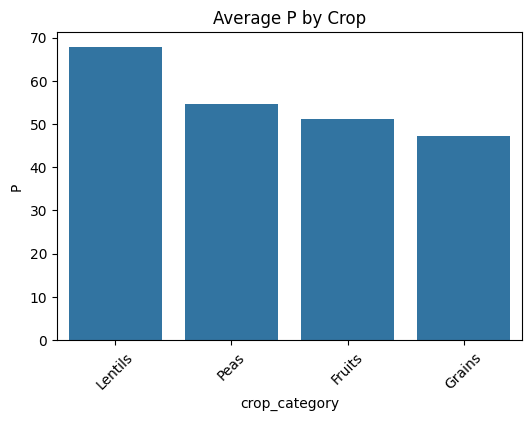

<ipython-input-24-783a1f4aa8e2>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crop_data, x=categorical_variable, y=feature, ci=None, order=avg_data)


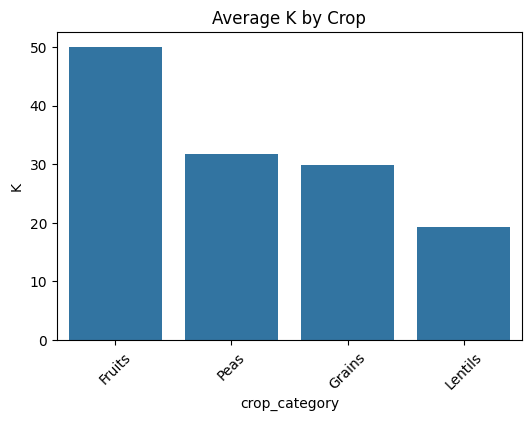

<ipython-input-24-783a1f4aa8e2>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crop_data, x=categorical_variable, y=feature, ci=None, order=avg_data)


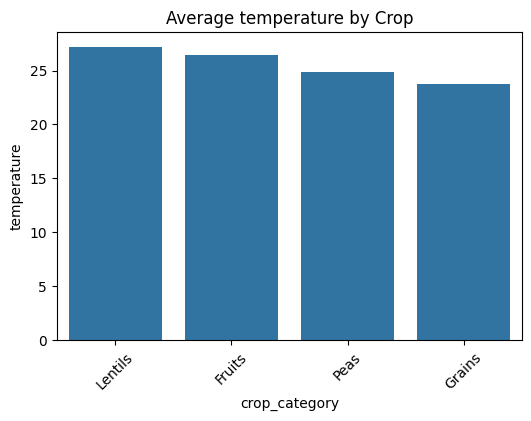

<ipython-input-24-783a1f4aa8e2>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crop_data, x=categorical_variable, y=feature, ci=None, order=avg_data)


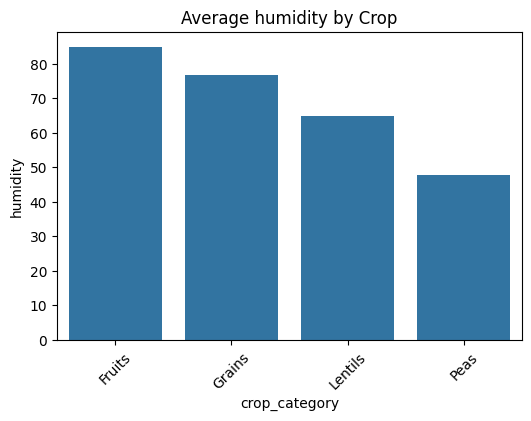

<ipython-input-24-783a1f4aa8e2>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crop_data, x=categorical_variable, y=feature, ci=None, order=avg_data)


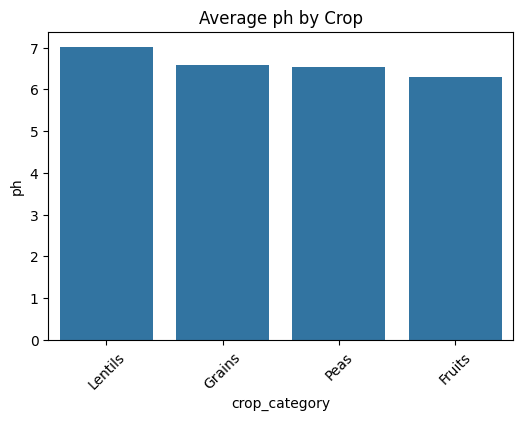

<ipython-input-24-783a1f4aa8e2>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crop_data, x=categorical_variable, y=feature, ci=None, order=avg_data)


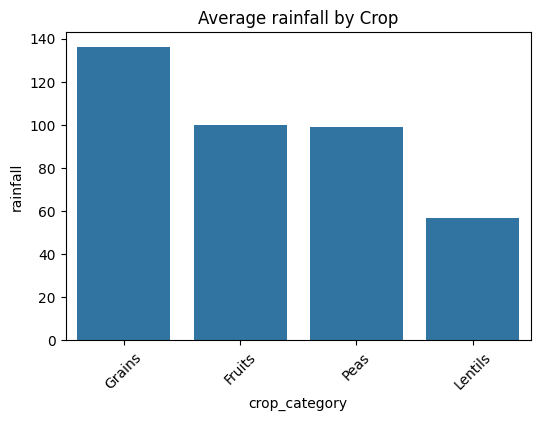

In [24]:
# Creating bar plots to display the average values by crop category for each numerical feature

numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
categorical_variable = 'crop_category'

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    avg_data = crop_data.groupby(categorical_variable)[feature].mean().sort_values(ascending=False).index
    sns.barplot(data=crop_data, x=categorical_variable, y=feature, ci=None, order=avg_data)
    plt.title(f'Average {feature} by Crop')
    plt.xticks(rotation=45)
    plt.show()


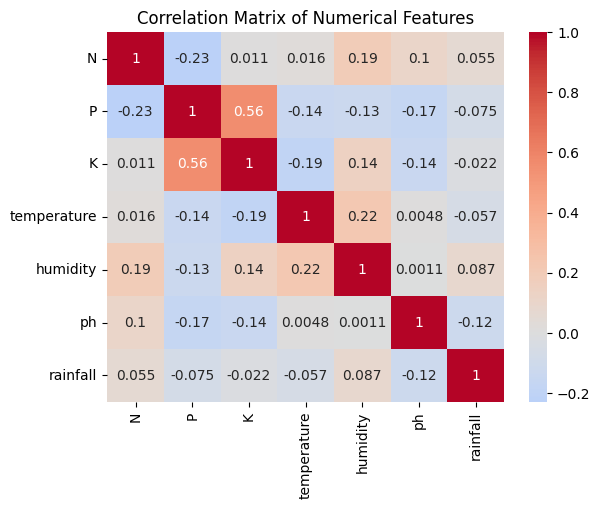

In [25]:
# Correlation Matrix and Heatmap
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
correlation_matrix = crop_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


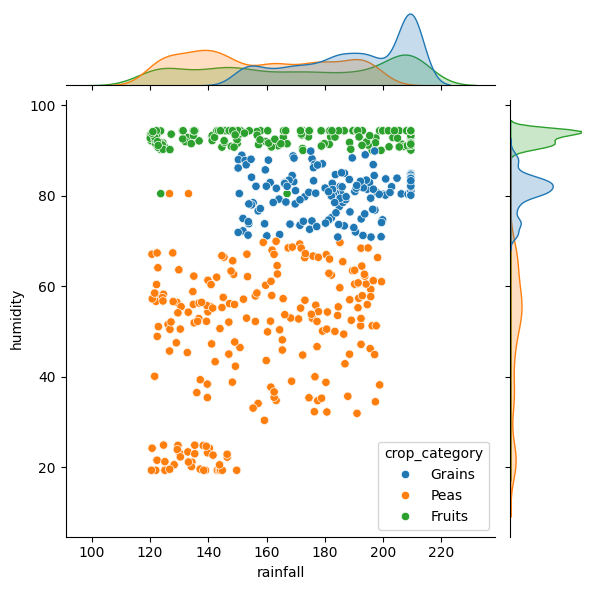

In [26]:
# Joint Plot with Specific Conditions and Hue Parameter
subset_data = crop_data[(crop_data['temperature'] < 35) & (crop_data['rainfall'] > 120)]
sns.jointplot(x="rainfall", y="humidity", data=subset_data, hue="crop_category")
plt.show()


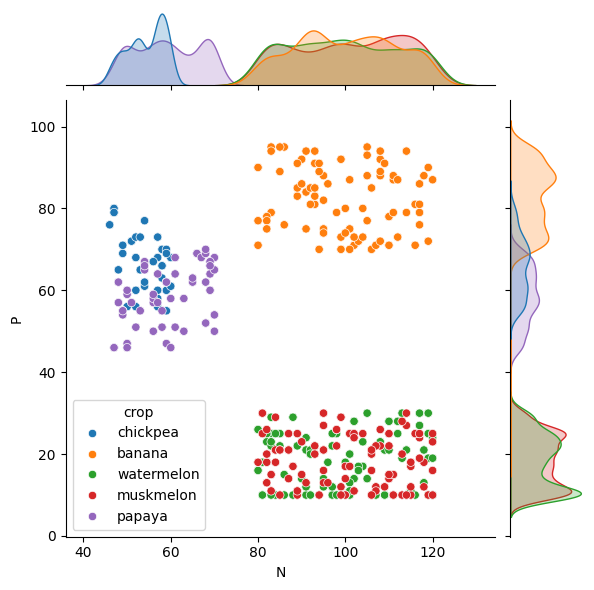

In [27]:
subset_data = crop_data[(crop_data['N'] > 45)  & (crop_data['K'] > 45)]
sns.jointplot(x="N", y="P", data=subset_data, hue="crop")
plt.show()

In [28]:
crop_data['crop'].value_counts()

banana         823
rice           800
jute           800
cotton         800
papaya         800
muskmelon      800
maize          799
coconut        799
apple          799
watermelon     799
mango          799
pomegranate    799
lentil         799
mungbean       799
mothbeans      799
kidneybeans    799
grapes         798
blackgram      798
orange         798
chickpea       798
coffee         798
pigeonpeas     797
Name: crop, dtype: int64

In [29]:
crop_data['crop_category'].value_counts()

Fruits     8014
Peas       4790
Grains     3199
Lentils    1597
Name: crop_category, dtype: int64

#Feature scaling**

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Defining the numerical features to be normalized
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the numerical features
crop_data[numerical_features] = scaler.fit_transform(crop_data[numerical_features])


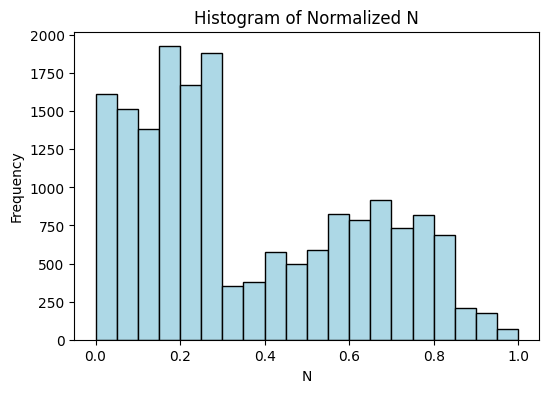

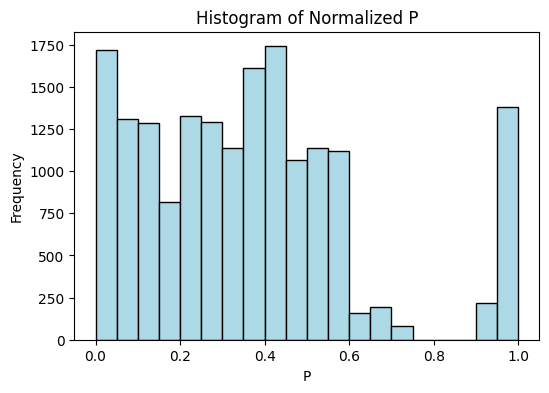

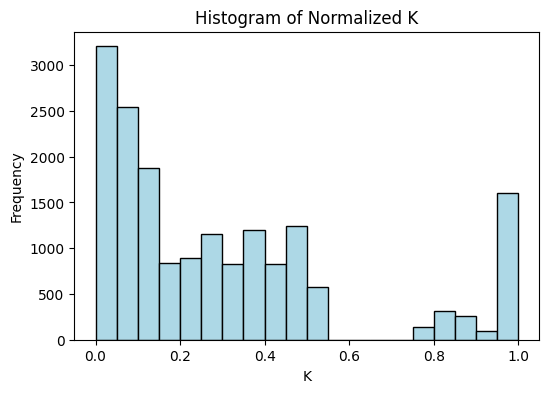

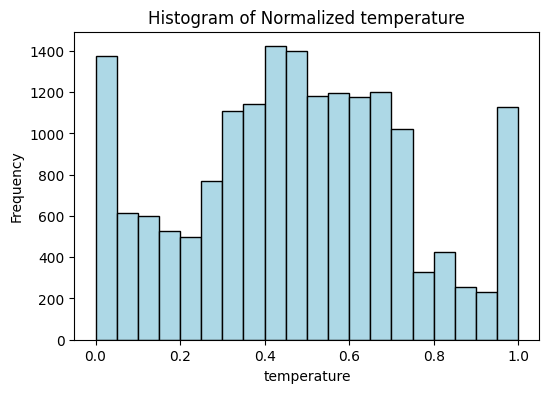

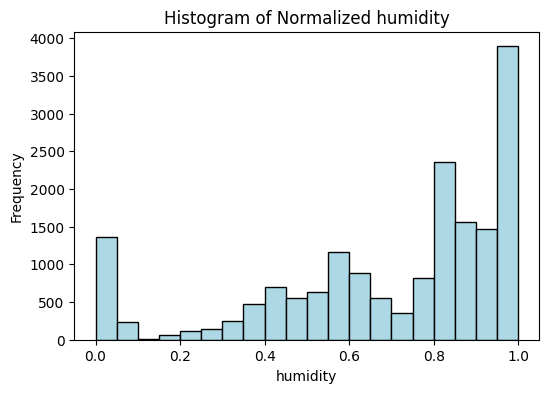

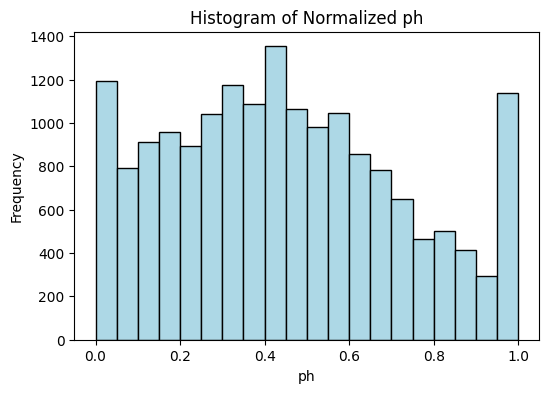

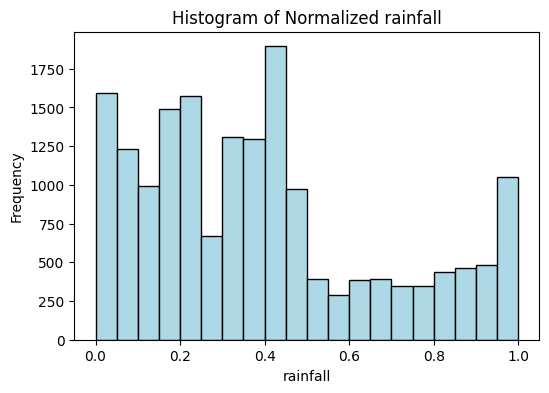

In [31]:
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
# Histograms for Normalized Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    plt.hist(crop_data[feature], bins=20, color='lightblue', edgecolor='black')
    plt.title(f'Histogram of Normalized {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [32]:
crop_data.dtypes

N                float64
P                float64
K                float64
temperature      float64
humidity         float64
ph               float64
rainfall         float64
crop              object
crop_category     object
dtype: object

#Modeling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# Setting the target variable and the features
y = crop_data['crop']
X = crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic regression**

In [34]:
from sklearn.linear_model import LogisticRegression

# Creating an instance of the model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_model.predict(X_test)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9701704545454546
Precision: 0.9708609195491791
Recall: 0.9701704545454546
F1 Score: 0.9702814531139271


**KNN-classifier**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Create a list to store the accuracy scores for different k values
accuracy_scores = []

# Iterate through different values of k
for k in range(1, 11):
    # Create an instance of the KNN model with the current value of k
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the training data
    knn_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = knn_model.predict(X_test)

    # Calculate the accuracy and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the accuracy scores for different k values
for k, accuracy in enumerate(accuracy_scores, 1):
    print(f'Accuracy for k={k}: {accuracy}')


Accuracy for k=1: 0.9965909090909091
Accuracy for k=2: 0.9943181818181818
Accuracy for k=3: 0.9980113636363637
Accuracy for k=4: 0.9980113636363637
Accuracy for k=5: 0.9980113636363637
Accuracy for k=6: 0.9965909090909091
Accuracy for k=7: 0.9965909090909091
Accuracy for k=8: 0.9954545454545455
Accuracy for k=9: 0.9931818181818182
Accuracy for k=10: 0.9917613636363637


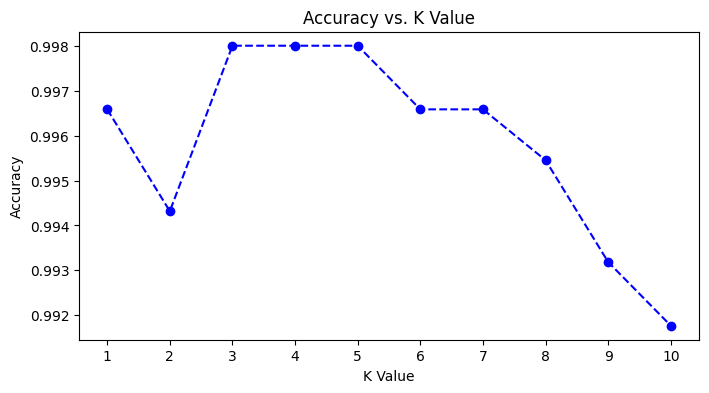

In [37]:
import matplotlib.pyplot as plt

# Plot the accuracy scores for different k values
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), accuracy_scores, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.show()


In [38]:
# Creating an instance of the KNN model with the best value of k
best_k = 3
knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_model.predict(X_test)

# Calculate precision, recall, F1 score, and AUC-ROC
accuracy= accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(y_test, knn_model.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy:{accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC: {auc_roc}')



Accuracy:0.9980113636363637
Precision: 0.9980320394766329
Recall: 0.9980113636363637
F1 Score: 0.9980059062971576
AUC-ROC: 0.9990534266759723


**Decision Tree classifier**

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# Create an instance of the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

# Calculate accuracy, precision, recall, F1 score, and AUC-ROC
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(y_test, dt_model.predict_proba(X_test),multi_class='ovr')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC: {auc_roc}')


Accuracy: 0.9977272727272727
Precision: 0.9977287184675603
Recall: 0.9977272727272727
F1 Score: 0.997720452213571
AUC-ROC: 0.9988860575090638


**Decision tree with hyper-parameter tuned**

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to be tuned
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create an instance of GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [41]:
# Make predictions on the testing data using the best model from the grid search
y_pred = grid_search.predict(X_test)

# Calculate accuracy, precision, recall, F1 score, and AUC-ROC
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(y_test, grid_search.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC: {auc_roc}')

Accuracy: 0.9542613636363636
Precision: 0.9745431158264072
Recall: 0.9542613636363636
F1 Score: 0.9439855648321609
AUC-ROC: 0.9969054264414762


**Random Forest Classifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest model with n_estimators=100
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate accuracy, precision, recall, F1 score, and AUC-ROC
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC: {auc_roc}')

Accuracy: 0.9982954545454545
Precision: 0.9983101002899331
Recall: 0.9982954545454545
F1 Score: 0.9982889141718992
AUC-ROC: 0.9993395154831792


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


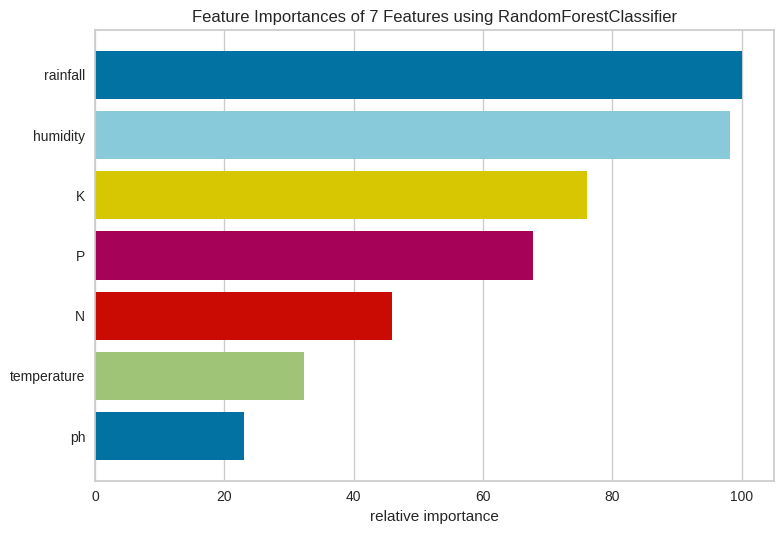

<Axes: title={'center': 'Feature Importances of 7 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [43]:
#Checking feature importance on the model
from yellowbrick.model_selection import FeatureImportances

# Create a FeatureImportances visualizer
viz = FeatureImportances(rf_model)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In [44]:
# Get the feature importances
feature_importance_magnitude = rf_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_magnitude})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


       Feature  Importance
6     rainfall    0.225545
4     humidity    0.221464
2            K    0.171551
1            P    0.152871
0            N    0.103550
3  temperature    0.073021
5           ph    0.051998
